In [1]:
import os
import numpy as np
from skimage import io
from particle.utils.plotter import makeGrid

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
# matplotlib.rcParams['text.usetex'] = True
# matplotlib.rcParams['text.latex.unicode'] = True
# matplotlib.rcParams['text.latex.preamble'] = [
#     '\\usepackage{CJK}',
#     r'\AtBeginDocument{\begin{CJK}{UTF8}{gbsn}}',
#     r'\AtEndDocument{\end{CJK}}'
# ]
sns.set(font_scale=1.3)
sns.set_style({"font.family": "Monospace"})

In [2]:
def comparator(name:str):
    part1, part2 = name.split('-')
    name = f"{int(part1):02d}-{part2}"
    return name

In [3]:
# 隐变量维数
# path = "/home/chuan/soil/output/dcgan/iterD:iterG=1:1/nLatent8/process"
# path = "/home/chuan/soil/output/dcgan/iterD:iterG=1:1/nLatent16/process"
path = "/home/chuan/soil/output/dcgan/iterD:iterG=1:1/nLatent32/process"

In [4]:
imgFiles = os.listdir(path)
imgFiles.sort(key=comparator)
imgFiles

['1-1.png',
 '1-2.png',
 '1-3.png',
 '1-4.png',
 '1-5.png',
 '2-1.png',
 '2-2.png',
 '2-3.png',
 '2-4.png',
 '2-5.png',
 '3-1.png',
 '3-2.png',
 '3-3.png',
 '3-4.png',
 '3-5.png',
 '4-1.png',
 '4-2.png',
 '4-3.png',
 '4-4.png',
 '4-5.png',
 '5-1.png',
 '5-2.png',
 '5-3.png',
 '5-4.png',
 '5-5.png',
 '6-1.png',
 '6-2.png',
 '6-3.png',
 '6-4.png',
 '6-5.png',
 '7-1.png',
 '7-2.png',
 '7-3.png',
 '7-4.png',
 '7-5.png',
 '8-1.png',
 '8-2.png',
 '8-3.png',
 '8-4.png',
 '8-5.png',
 '9-1.png',
 '9-2.png',
 '9-3.png',
 '9-4.png',
 '9-5.png',
 '10-1.png',
 '10-2.png',
 '10-3.png',
 '10-4.png',
 '10-5.png',
 '11-1.png',
 '11-2.png',
 '11-3.png',
 '11-4.png',
 '11-5.png',
 '12-1.png',
 '12-2.png',
 '12-3.png',
 '12-4.png',
 '12-5.png',
 '13-1.png',
 '13-2.png',
 '13-3.png',
 '13-4.png',
 '13-5.png',
 '14-1.png',
 '14-2.png',
 '14-3.png',
 '14-4.png',
 '14-5.png',
 '15-1.png',
 '15-2.png',
 '15-3.png',
 '15-4.png',
 '15-5.png',
 '16-1.png',
 '16-2.png',
 '16-3.png',
 '16-4.png',
 '16-5.png',
 '17-

In [5]:
sample = io.imread(os.path.join(path, imgFiles[0]))
sample.shape

(350, 400, 3)

In [6]:
imgs = np.empty((len(imgFiles), *sample.shape), dtype=sample.dtype)
for i, imgFile in enumerate(imgFiles):
    imgs[i] = io.imread(os.path.join(path, imgFile))

In [7]:
savePath = os.path.join(path, "..")

In [8]:
slicer = [[i + j for j in range(5)] for i in range(0, 70, 10)]
# slicer = [[i + j for j in range(5)] for i in range(50, 75, 5)]
slicer = sum(slicer, [])
print(slicer)
makeGrid(imgs[slicer], os.path.join(savePath, "process2.png"), nrow=5)

[0, 1, 2, 3, 4, 10, 11, 12, 13, 14, 20, 21, 22, 23, 24, 30, 31, 32, 33, 34, 40, 41, 42, 43, 44, 50, 51, 52, 53, 54, 60, 61, 62, 63, 64]


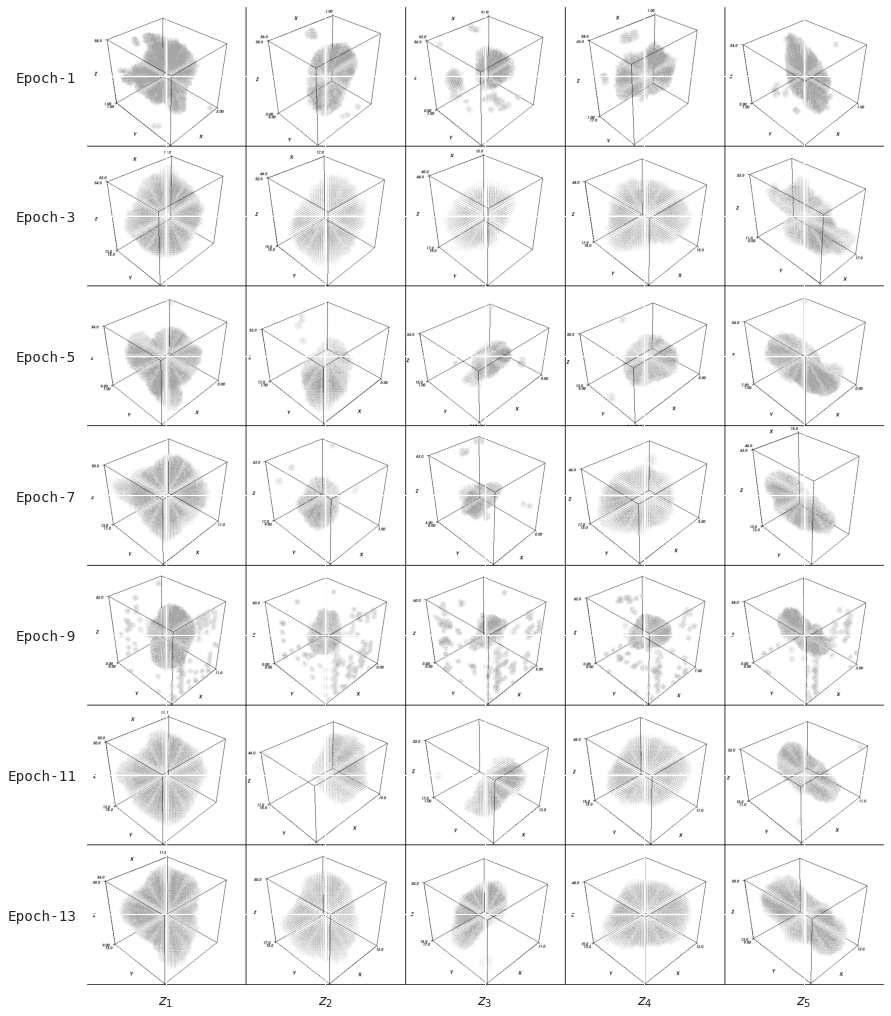

In [9]:
image = io.imread(os.path.join(savePath, "process2.png"))
xUnit = image.shape[1] // 10
yUnit = image.shape[0] // 14
# yUnit = image.shape[0] // 10
plt.figure(figsize=(24, 18))
plt.imshow(image)
plt.xticks(range(xUnit, image.shape[1], xUnit*2), [f'$z_{i}$' for i in range(1, 6)])
plt.yticks(range(yUnit, image.shape[0], yUnit*2), [f'Epoch-{1+2*i}' for i in range(7)])
# plt.yticks(range(yUnit, image.shape[0], yUnit*2), [f'Epoch-{11+i}' for i in range(5)])
plt.savefig(os.path.join(savePath, "process2.png"), dpi=200)

In [10]:
from particle.utils.log import parseLog
plt.style.use("bmh")
def plotTrainCurveOfGan(category, step=5):
    plt.figure(figsize=(16, 12))
    if category == "probability":
        feature1 = "D(x)"
        feature2 = "D(G(z))"
        logPath = os.path.join(path, "../dcgan.log")
        var1 = parseLog(logPath, feature1)[:1000]
        var2 = parseLog(logPath, feature2)[:1000]
        xRange = range(0, len(var1)*10, step*10)
        plt.plot(xRange, var1[::step], label=feature1)
        plt.plot(xRange, var2[::step], label=feature2)
        plt.xlabel('iteration')
        plt.ylabel('probability')
        plt.legend()
        plt.savefig(os.path.join(savePath, "trainCurve-probability.png"), dpi=150)
    elif category == "loss":
        feature1 = "loss_D"
        feature2 = "loss_G"
        logPath = os.path.join(path, "../dcgan.log")
        var1 = parseLog(logPath, feature1)[:1000]
        var2 = parseLog(logPath, feature2)[:1000]
        xRange = range(0, len(var1)*10, step*10)
        plt.plot(xRange, var1[::step], label=feature1)
        plt.plot(xRange, var2[::step], label=feature2)
        plt.xlabel('iteration')
        plt.ylabel('loss')
        plt.legend()
        plt.savefig(os.path.join(savePath, "trainCurve-loss.png"), dpi=150)

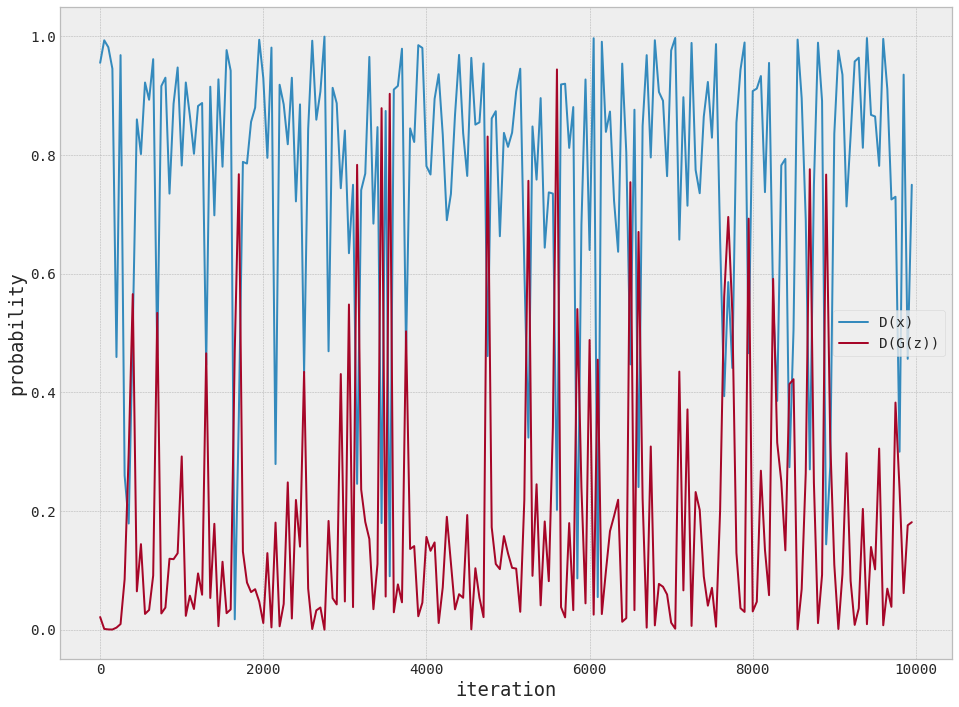

In [11]:
plotTrainCurveOfGan('probability')

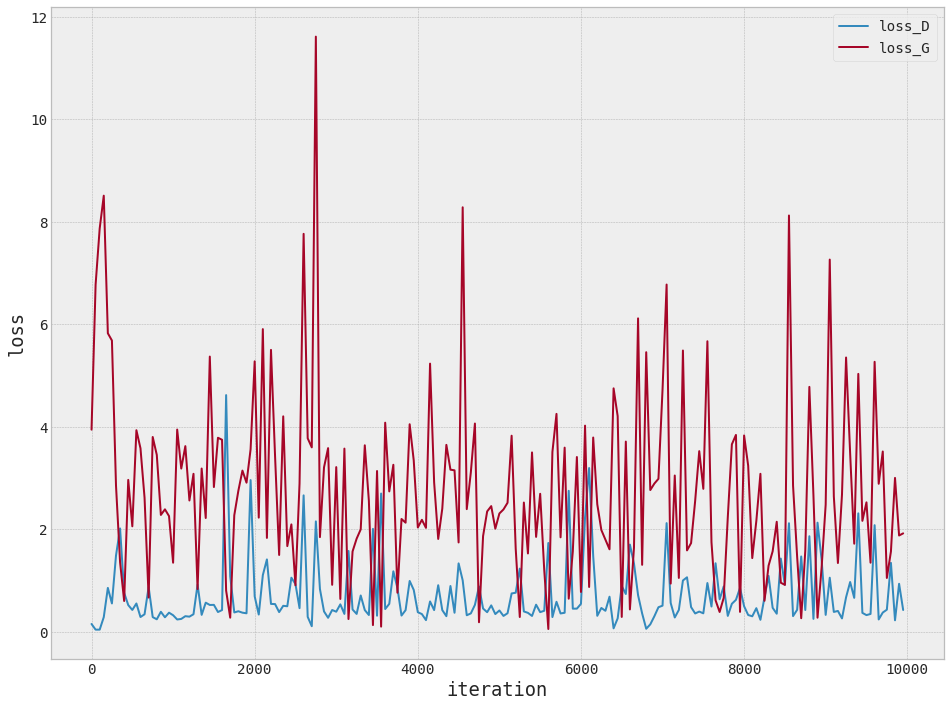

In [12]:
plotTrainCurveOfGan("loss")